<div style="text-align: center;">
    <h1>Classification Problems: Logistic Regression</h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix

## Logistic Regression Class

In [411]:
class logistic_regression:
  def __init__(self, lambda_= 0.01, kappa=0.7, tau= 0.2, epochs= 100):
    self.lambda_ = lambda_
    self.epochs = epochs
    self.theta = None
    self.tau = tau
    self.kappa = kappa
    self.cost =  None
    self.miu = None #The mean of the Bernoulli distribution

  def sigmoid(self, z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

  def lr_objective(self, X, y, theta):
    self.miu = self.sigmoid(X @ theta)
    # Clip for numerical stability
    self.miu = np.clip(self.miu, 0.001, 0.999)

    cost_ = -1/X.shape[0] * np.dot(y, np.log(self.miu)) -1/X.shape[0] * np.dot((1 - y), np.log(1 - self.miu)) + self.lambda_ * np.dot(theta, theta)
    grad = - X.T @ (y - self.miu) + 2 * self.lambda_ * theta
    return cost_, grad

  def fit(self, X_train, y_train):
    n_samples, n_features = X_train.shape
    self.cost = np.zeros(self.epochs)
    self.theta = 0.23 * np.ones(n_features)

    for i in range(self.epochs):
      #print(self.miu)
      eta = pow(self.tau + i+1, -self.kappa)
      C, grad = self.lr_objective(X_train, y_train, self.theta)
      self.theta -= eta * grad
      self.cost[i] = C
      if C < 1e-6:
        break

  def predict(self, X_test):
    y_pred = self.sigmoid(np.dot(X_test, self.theta))
    y_pred = np.where(y_pred < 0.5, 0, 1)
    return y_pred

  def plot_cost(self):
    #print(self.cost)
    plt.figure()
    plt.plot(range(len(self.cost)), self.cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    #plt.xlim(0, 20)
    plt.title('Cost vs Epochs')
    plt.show()

## Cancer Dataset

In [8]:
from sklearn.datasets import load_breast_cancer

In [149]:
# Load dataset
data_frame = load_breast_cancer()
data = data_frame.data
target = data_frame.target

In [150]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


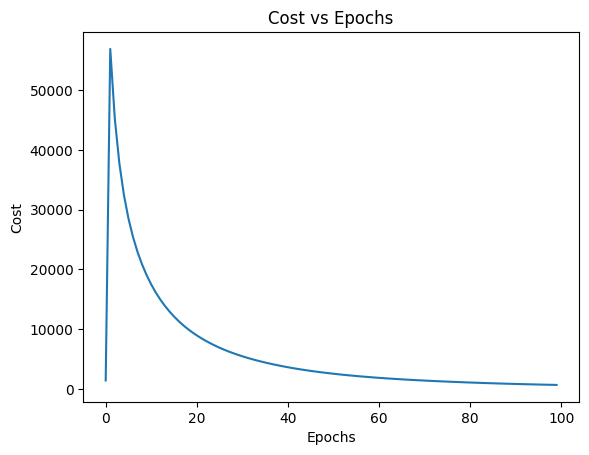

In [229]:
clf = logistic_regression(lambda_= 0.08, tau= 0.9, kappa = 0.6, epochs=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
clf.plot_cost()

In [230]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("Logistic Regression accuracy: ", acc)

Logistic Regression accuracy:  0.9736842105263158


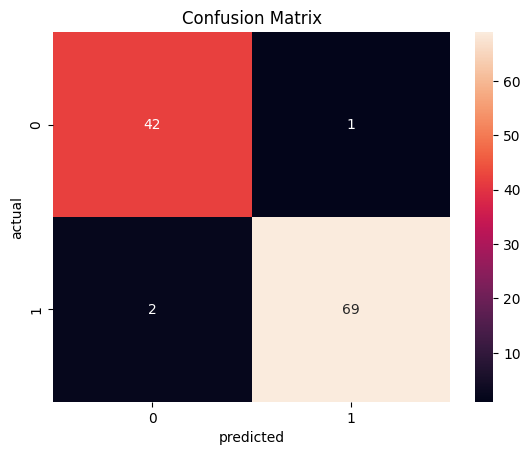

In [231]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Wine Dataset

In [232]:
from sklearn.datasets import load_wine

In [352]:
# Load dataset
data_frame = load_wine()
data = data_frame.data
target = data_frame.target

In [353]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train0 = np.where(y_train == 0, 0, 1)
y_train1 = np.where(y_train == 1, 0, 1)
y_train2 = np.where(y_train == 2, 0, 1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
clf0 = logistic_regression(lambda_= 0.1, kappa=0.6, tau= 0.2, epochs= 10)
clf0.fit(X_train, y_train0)
y_pred0 = clf0.predict(X_test)

clf1 = logistic_regression(lambda_= 0.1, kappa=0.6, tau= 0.2, epochs= 200)
clf1.fit(X_train, y_train1)
y_pred1 = clf1.predict(X_test)

clf2 = logistic_regression(lambda_= 0.1, kappa=0.6, tau= 0.2, epochs= 100)
clf2.fit(X_train, y_train2)
y_pred2 = clf2.predict(X_test)

In [355]:
y_pred = np.zeros(len(y_pred0))
y_pred[y_pred1 == 1] = 2
y_pred[y_pred0 == 0] = 0
y_pred[y_pred1 == 0] = 1


In [356]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("Logistic Regression accuracy: ", acc)

Logistic Regression accuracy:  1.0


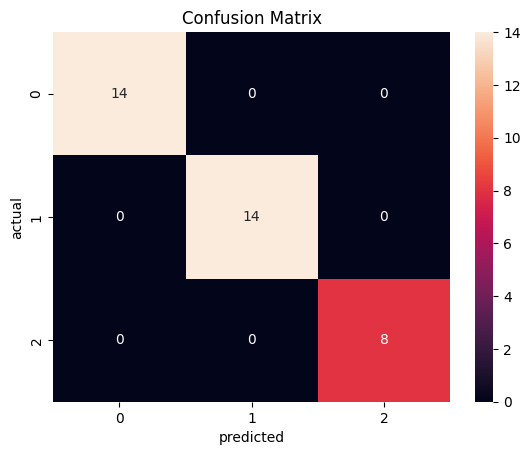

In [357]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Iris Dataset

In [358]:
from sklearn.datasets import load_iris

In [376]:
data_frame = load_iris()
data = data_frame.data
target = data_frame.target

In [412]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train0 = np.where(y_train == 0, 0, 1)
y_train1 = np.where(y_train == 1, 0, 1)
y_train2 = np.where(y_train == 2, 0, 1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [566]:
clf0 = logistic_regression(lambda_= 0.1, kappa=0.6, tau= 0.2, epochs= 100)
clf0.fit(X_train, y_train0)
y_pred0 = clf0.predict(X_test)
y_test0 = np.where(y_test == 0, 0, 1)

clf1 = logistic_regression(lambda_= 0.1, kappa=0.6, tau= 0.2, epochs= 100)
clf1.fit(X_train, y_train1)
y_pred1 = clf1.predict(X_test)
y_test1 = np.where(y_test == 1, 0, 1)

clf2 = logistic_regression(lambda_= 0.01, kappa=0.6, tau= 0.2, epochs= 100)
clf2.fit(X_train, y_train2)
y_pred2 = clf2.predict(X_test)
y_test2 = np.where(y_test == 2, 0, 1)

In [567]:
y_pred = np.zeros(len(y_pred0))
y_pred[y_pred0 == 0] = 0
y_pred[y_pred0 == 1] = 1
y_pred[y_pred2 == 0] = 2


Logistic Regression accuracy:  0.9


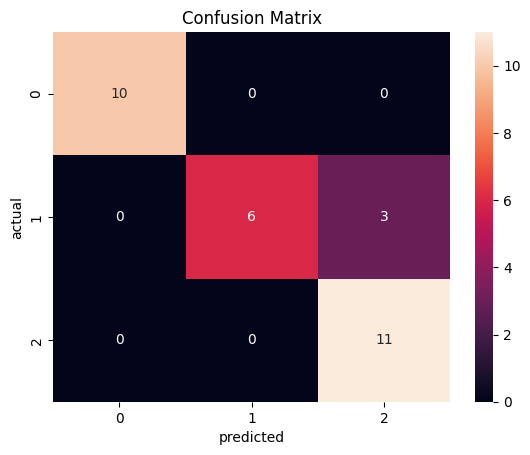

In [568]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("Logistic Regression accuracy: ", acc)

plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()